In [2]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re

%matplotlib inline

In [197]:
df = pd.read_csv('/Users/elkehansen/Documents/general_assembly/Project-4-Submission/Elke_Project_4/seek-data.csv')

In [527]:
df.head()

,Job Title,Company,Company Rating,Salary,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Estimators
0,Digital Analyst,JORA,5.0 overall rating (16 employee reviews),Base + Super + Profit Share,Marketing & Communications,", Digital & Search Marketing",Melbourne,", CBD & Inner Suburbs",Full Time,About Jora Jora is an Australian based job sea...,\n$55K\n$90K\n$140K\n
1,Data Analyst - Data Quality,RACWA,3.5 overall rating (109 employee reviews),Contract/Temp,Information & Communication Technology,", Business/Systems Analysts",Perth,", CBD, Inner & Western Suburbs",Contract/Temp,In light of our Member Centred Program and sh...,\n$35K\n$70K\n$140K\n
2,Data & Reporting Analyst,Telecommunications Industry Ombudsman,2.9 overall rating (18 employee reviews),"$70,000 - $84,999",Information & Communication Technology,", Business/Systems Analysts",Melbourne,", CBD & Inner Suburbs",Full Time,24 Month Maximum Term role Competitive sala...,NaN
3,Junior Data Analyst,RXP Group,NaN,Full Time,Information & Communication Technology,", Database Development & Administration",Sydney,", CBD, Inner West & Eastern Suburbs",Full Time,RXP Group (ASX: RXP) A Digital Services Partne...,\n$30K\n$110K\n$160K\n
4,Data Analyst,Chandler Macleod Group,NaN,super,Information & Communication Technology,", Other",Sydney,", CBD, Inner West & Eastern Suburbs",Contract/Temp,One of our clients is looking for a Data Speci...,\n$30K\n$110K\n$160K\n


##### Look at roles where the role description is duplicated to potentially spot duplicates 

In [198]:

def duplicate_list(df, col):
    """
       Takes a dataframe and a column within that dataframe and 
       returns a list of duplicate values within that column
       
       Parameters:
       df
         pandas dataframe
       col
         string of column name
         
       Returns:
       list
         a list of duplicate values 
         
    """
    col_vc = df[col].value_counts()
    duplicates = col_vc[col_vc>1].index.tolist()
    return duplicates

In [199]:
first_dup = duplicate_list(df,'Role Description')[0]

In [200]:
df[df['Role Description'] == first_dup].head()

,Unnamed: 0,Job Title,Company,Company Rating,Salary,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Estimators,Url
1047,1047,Assistant Directors,Department of Agriculture and Water Resources,3.1 overall rating (8 employee reviews),"$99,966-112,798",Science & Technology,", Mathematics, Statistics & Information Sciences",ACT,NaN,Full Time,The Australian Bureau of Agricultural and Reso...,\n$80K\n$110K\n$150K\n,https://www.seek.com.au/job/39597115?type=stan...
1071,1071,Assistant Directors,Department of Agriculture and Water Resources,3.1 overall rating (8 employee reviews),"$99,966-112,798",Government & Defence,", Government - Federal",ACT,NaN,Full Time,The Australian Bureau of Agricultural and Reso...,\n$80K\n$110K\n$150K\n,https://www.seek.com.au/job/39612778?type=stan...
1072,1072,Assistant Directors,Department of Agriculture and Water Resources,3.1 overall rating (8 employee reviews),"$99,966-112,798",Government & Defence,", Government - Federal",ACT,NaN,Full Time,The Australian Bureau of Agricultural and Reso...,\n$80K\n$110K\n$150K\n,https://www.seek.com.au/job/39613010?type=stan...
1073,1073,Assistant Directors,Department of Agriculture and Water Resources,3.1 overall rating (8 employee reviews),"$99,966-112,798",Government & Defence,", Government - Federal",ACT,NaN,Full Time,The Australian Bureau of Agricultural and Reso...,\n$80K\n$110K\n$150K\n,https://www.seek.com.au/job/39613029?type=stan...
1074,1074,Assistant Directors,Department of Agriculture and Water Resources,3.1 overall rating (8 employee reviews),"$99,966-112,798",Government & Defence,", Government - Federal",ACT,NaN,Full Time,The Australian Bureau of Agricultural and Reso...,\n$80K\n$110K\n$150K\n,https://www.seek.com.au/job/39613058?type=stan...


##### Duplicated columns are not being shown due to the Url column so I will drop this as well as the extra index in place due to the way I saved the csv file

In [201]:
df.drop(columns=['Unnamed: 0','Url'], inplace=True)

In [202]:
df[df.duplicated() == True].shape

(359, 11)

In [203]:
df.drop_duplicates(inplace=True)

In [204]:
df.shape

(4004, 11)

##### It might be the case that the same role is listed under different industries for better reach to candidates so I want to drop duplicates based on a subset exclusing this information as well

In [205]:
df.drop_duplicates(subset=['Job Title','Company','Salary','City','Contract Type','Role Description'], inplace =True)

## Cleaning

I want to do some general cleaning of the data within the columns before looking at any datatypes or any further EDA 
1. Look at the value_counts of each of the columns and see where cleaning needs to be done
2. Do some simple cleaning of punctuation etc.
3. Use regular expression to pull out pieces of information I want 

I will start with non salary related columns

In [14]:
df.shape

(3801, 11)

In [15]:
df.columns

Index(['Job Title', 'Company', 'Company Rating', 'Salary', 'Industry',
       'Sub Industry', 'City', 'Proximity to city', 'Contract Type',
       'Role Description', 'Salary Estimators'],
      dtype='object')

In [16]:
df['Job Title'].value_counts().head(20)

Business Analyst                   102
Data Analyst                        70
Data Engineer                       42
Technical Business Analyst          42
Data Architect                      35
Data Scientist                      30
Senior Business Analyst             26
Commercial Analyst                  19
Senior Data Scientist               18
Senior Data Engineer                14
Solution Architect                  14
Senior Data Analyst                 14
Pricing Analyst                     13
Financial Analyst                   13
BI Developer                        12
Database Administrator              10
ETL Developer                        9
Research Assistant                   9
Reporting Analyst                    9
Business Intelligence Developer      9
Name: Job Title, dtype: int64

In [17]:
len(df['Job Title'].value_counts())

2762

In [19]:
df['Company'].value_counts().head(30)

Hays Information Technology                                                         70
Paxus                                                                               69
Bluefin Resources Pty Limited                                                       51
Robert Walters                                                                      48
Data#3                                                                              47
Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!    45
Michael Page Information Technology                                                 37
Hudson                                                                              36
Charterhouse                                                                        35
Chandler Macleod Group                                                              32
Dimension Data                                                                      31
Randstad - Technologies                    

In [20]:
len(df['Company'].value_counts())

1458

* Nothing here looks to need cleaning. The values are extremely variant though, so probably not good for much

In [21]:
df['Company Rating'].value_counts().head(30)

3.8 overall rating (53 employee reviews)       47
3.4 overall rating (153 employee reviews)      31
3.4 overall rating (165 employee reviews)      25
3.6 overall rating (249 employee reviews)      16
3.3 overall rating (142 employee reviews)      15
3.8 overall rating (41 employee reviews)       13
3.3 overall rating (212 employee reviews)      13
2.7 overall rating (54 employee reviews)       12
3.6 overall rating (1134 employee reviews)     12
2.9 overall rating (58 employee reviews)       11
3.6 overall rating (28 employee reviews)       11
3.3 overall rating (12 employee reviews)       11
3.3 overall rating (177 employee reviews)      10
3.4 overall rating (119 employee reviews)      10
2.7 overall rating (19 employee reviews)       10
2.7 overall rating (64 employee reviews)       10
3.5 overall rating (578 employee reviews)       9
2.8 overall rating (5 employee reviews)         9
2.5 overall rating (21 employee reviews)        8
4.4 overall rating (245 employee reviews)       7


* For this I just want to take out the overall rating number. I'm not too interested in the rest

In [22]:
sum(df['Company Rating'].isna())

2668

In [23]:
df['Company Rating'] = df['Company Rating'].str[0:3]

In [24]:
df['Company Rating'].value_counts().sum()

1133

* As there are only ~30% of data containing this star rating information, if I want to use this as a feature, I may need to see if I can impute more of this 

In [25]:
print('count:', df['Industry'].value_counts().count())
df['Industry'].value_counts().head(10)

count: 29


Information & Communication Technology    2243
Administration & Office Support            215
Accounting                                 187
Banking & Financial Services               179
Marketing & Communications                 140
Government & Defence                       135
Consulting & Strategy                       91
Science & Technology                        88
Healthcare & Medical                        73
Manufacturing, Transport & Logistics        67
Name: Industry, dtype: int64

* Nothing here looks to need cleaning. 

In [26]:
print('count:', df['Sub Industry'].value_counts().count())
df['Sub Industry'].value_counts().head(10)

count: 169


, Business/Systems Analysts                715
, Analysis & Reporting                     347
, Developers/Programmers                   340
, Database Development & Administration    317
, Other                                    268
, Consultants                              188
, Architects                               161
, Administrative Assistants                123
, Engineering - Software                   117
, Market Research & Analysis                91
Name: Sub Industry, dtype: int64

* Just need to remove the comma and space before each

In [27]:
df['Sub Industry'] = df['Sub Industry'].map(lambda x: x.replace(', ',''))

In [28]:
df['Sub Industry'].value_counts().head()

Business/Systems Analysts                715
Analysis & Reporting                     347
Developers/Programmers                   340
Database Development & Administration    317
Other                                    268
Name: Sub Industry, dtype: int64

In [29]:
df['City'].value_counts()

Sydney                                  1552
Melbourne                               1026
Brisbane                                 391
Perth                                    240
ACT                                      216
Adelaide                                 110
Newcastle, Maitland & Hunter              46
South West Coast VIC                      42
Gold Coast                                21
Darwin                                    17
Gosford & Central Coast                   15
Wollongong, Illawarra & South Coast       14
Northern QLD                              12
Hobart                                    10
Mackay & Coalfields                       10
Toowoomba & Darling Downs                  6
Ballarat & Central Highlands               6
Gladstone & Central QLD                    4
Southern Highlands & Tablelands            4
Wagga Wagga & Riverina                     4
Mornington Peninsula & Bass Coast          4
Cairns & Far North                         4
Bendigo, G

* Nothing here looks to need cleaning. The values are extremely variant though, so I want to combine the cities outside major capital cities into one category

In [30]:
capitals = ['Sydney','Melbourne','Brisbane','Perth','ACT','Adelaide'] 

In [31]:
df['City'] = df['City'].map(lambda x: x if x in capitals else 'Regional')

In [32]:
df['City'].value_counts()

Sydney       1552
Melbourne    1026
Brisbane      391
Regional      266
Perth         240
ACT           216
Adelaide      110
Name: City, dtype: int64

In [33]:
df['Proximity to city'].value_counts()

, CBD, Inner West & Eastern Suburbs      890
, CBD & Inner Suburbs                    868
, CBD, Inner & Western Suburbs           151
, Parramatta & Western Suburbs           139
, North Shore & Northern Beaches         118
, Ryde & Macquarie Park                   90
, Eastern Suburbs                         88
, Bayside & South Eastern Suburbs         58
, Northern Suburbs                        53
, Western Suburbs                         29
, Southern Suburbs & Sutherland Shire     21
, Southern Suburbs & Logan                19
, North West & Hills District             19
, South West & M5 Corridor                18
, Fremantle & Southern Suburbs            15
, Bayside & Eastern Suburbs                8
, Western Suburbs & Ipswich                7
, Northern Suburbs & Joondalup             5
, Rockingham & Kwinana                     1
Name: Proximity to city, dtype: int64

In [34]:
df['Proximity to city'] = df['Proximity to city'].str[2:]

In [35]:
df['Contract Type'].value_counts()

Full Time          2389
Contract/Temp      1335
Part Time            52
Casual/Vacation      25
Name: Contract Type, dtype: int64

* Nothing here needs to be cleaned, may want to only use Full Time roles?

## Evaluating Salary Information

 As our first target will be salary and salary information is extremely sparse as well as varied in format, it is really important to make sure that this is explored in a way that will not adversley affect the final model.
 So let's see what information we do have:
 * Salary : The salary values provided on Seek for the individual role. This is entered by the individual advertiser and does not have a set structure. Only 838 (22%) of these have numerical values in them 
 * Salary Estimators: This is a range of 2 to 3 values that represent the min, mode and max of salary estimate based on Seek's own salary prediction model. From what I can tell on Seek, this model is based on other roles with the same or similar job title within the same city.
 
 From these two pieces of information, I would like to take the actual salaries listed and compare them to the seek salary estimates to see how accurate they are, then use the estimates to impute across the data that contains this

In [36]:
df['Salary'].value_counts().head(30)

Full Time                                             1559
Contract/Temp                                          857
Part Time                                               36
Casual/Vacation                                         20
competitive                                              8
Great Package + Convenient Location + EndUser            7
Market Rate                                              6
Competitive salary on offer                              6
Up to $0.00 p.a.                                         6
Super                                                    6
$80,000 - $119,999                                       5
Attractive package                                       5
Attractive Salary Package                                5
Super                                                    5
$60,000 - $79,999                                        5
To be discussed upon application                         4
$82,281 - $88,333 + 15.4% Superannuation                

##### Some of these are really specfic, so I just want to check that they are not the same role that has snuckthrough during the removing of duplicates process

In [515]:
df[df['Salary']=='$82,281 - $88,333 + 15.4% Superannuation']

,Job Title,Company,Company Rating,Salary,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Estimators
3149,ASIO Intelligence Professionals July 2020 Inta...,Australian Security Intelligence Organisation,NaN,"$82,281 - $88,333 + 15.4% Superannuation",Government & Defence,", Government - Federal",Adelaide,NaN,Full Time,Australia’s protection begins with our Intelli...,NaN
3305,ASIO Intelligence Professionals July 2020 Inta...,Australian Security Intelligence Organisation,NaN,"$82,281 - $88,333 + 15.4% Superannuation",Government & Defence,", Government - Federal",Sydney,", CBD, Inner West & Eastern Suburbs",Full Time,Australia’s protection begins with our Intelli...,NaN
3392,ASIO Intelligence Professionals July 2020 Inta...,Australian Security Intelligence Organisation,NaN,"$82,281 - $88,333 + 15.4% Superannuation",Government & Defence,", Government - Federal",Hobart,NaN,Full Time,Australia’s protection begins with our Intelli...,NaN
3454,ASIO Intelligence Professionals July 2020 Inta...,Australian Security Intelligence Organisation,NaN,"$82,281 - $88,333 + 15.4% Superannuation",Government & Defence,", Other",ACT,NaN,Full Time,Australia’s protection begins with our Intelli...,NaN


##### Use regex and string operations to pull out the usable salaraies

In [39]:
df['Salary Numbers'] = df['Salary'].map(lambda x: x.replace(',',''))

In [40]:
df['Salary Numbers'].value_counts().head(20)

Full Time                                        1559
Contract/Temp                                     857
Part Time                                          36
Casual/Vacation                                    20
competitive                                         8
Great Package + Convenient Location + EndUser       7
Competitive salary on offer                         6
Up to $0.00 p.a.                                    6
Market Rate                                         6
Super                                               6
$80000 - $119999                                    5
Attractive package                                  5
$60000 - $79999                                     5
Super                                               5
Attractive Salary Package                           5
attractive package                                  4
Attractive Salary                                   4
$30 - $39.99 per hour                               4
$70000 - $89999             

In [41]:
## Two different regex options:
# ([0-9]{2,6}[K|k|]*\b(?![%|.]))
# [\$-]([0-9]{2,6}[K|k|]*)*\b(?![%|.])

In [42]:
def find_salary(data):
    pat =r'[\$-]([0-9]{2,6}[K|k|]*)*\b(?![%|.])'
    x = re.findall(pat,data)
    return x

In [43]:
df['Salary Numbers'] = df['Salary Numbers'].map(find_salary)

In [44]:
df['Salary Numbers'].value_counts().head(20)

[]                  2870
[]                    50
[, ]                  43
[100k, 120k]          12
[100k, 110k]          11
[30, ]                 8
[600, 650]             7
[120000]               7
[90000]                6
[30, 35]               6
[130000]               6
[80k, 100k]            6
[120k, 130k]           6
[600]                  6
[120000, 150000]       5
[80000]                5
[750]                  5
[80000, 90000]         5
[700]                  5
[120000, 130000]       5
Name: Salary Numbers, dtype: int64

In [45]:
df['Salary Numbers'] = df['Salary Numbers'].map(lambda x: [i.replace('k','000') for i in x])
df['Salary Numbers'] = df['Salary Numbers'].map(lambda x: [i.replace('K','000') for i in x])

In [46]:
df['Salary Numbers'].value_counts().head(15)

[]                  2870
[]                    50
[, ]                  43
[100000, 120000]      16
[130000]              13
[100000, 110000]      13
[120000, 130000]      12
[80000, 100000]       10
[80000]               10
[120000]               9
[90000]                9
[80000, 90000]         9
[30, ]                 8
[110000]               8
[90000, 110000]        8
Name: Salary Numbers, dtype: int64

* I have now got the salary numbers to a point I am happy with for now, I now want to look at the salary estimators and clean those before coming back to the salary column

In [47]:
df['Salary Estimators'].value_counts().head(20)

\n$30K\n$110K\n$160K\n    94
\n$30K\n$90K\n$150K\n     59
\n$35K\n$110K\n$170K\n    58
\n$45K\n$90K\n$140K\n     57
\n$45K\n$130K\n$200K\n    55
\n$55K\n$110K\n$170K\n    52
\n$60K\n$110K\n$150K\n    44
\n$50K\n$130K\n$190K\n    43
\n$50K\n$110K\n$150K\n    41
\n$30K\n$50K\n$85K\n      39
\n$45K\n$110K\n$150K\n    38
\n$90K\n$160K\n$200K\n    38
\n$30K\n$50K\n$90K\n      37
\n$50K\n$110K\n$180K\n    36
\n$30K\n$110K\n$190K\n    33
\n$45K\n$100K\n$140K\n    32
\n$45K\n$130K\n$190K\n    30
\n$40K\n$110K\n$160K\n    29
\n$45K\n$110K\n$160K\n    25
\n$55K\n$110K\n$150K\n    25
Name: Salary Estimators, dtype: int64

##### Removing \n from front and back of each row

In [48]:
df['Salary Estimators'] = df['Salary Estimators'].str[1:-1]

In [49]:
df['Salary Estimators'] = df['Salary Estimators'].str.replace('K','000')

In [50]:
df['Salary Estimators'] = df['Salary Estimators'].str.replace('$','')

In [51]:
df['Salary Estimators'] = df['Salary Estimators'].str.split('\n')

In [52]:
df['Salary Estimators'].value_counts().head(10)

[30000, 110000, 160000]    94
[30000, 90000, 150000]     59
[35000, 110000, 170000]    58
[45000, 90000, 140000]     57
[45000, 130000, 200000]    55
[55000, 110000, 170000]    52
[60000, 110000, 150000]    44
[50000, 130000, 190000]    43
[50000, 110000, 150000]    41
[30000, 50000, 85000]      39
Name: Salary Estimators, dtype: int64

##### Creation of a new dataframe of only values where salary estimators exist

In [53]:
sal_est_df = df[df['Salary Estimators'].isnull() == False]

In [54]:
type(sal_est_df['Salary Estimators'][0][0])

str

##### Changing the values within each list to an integer so I can doing mathematical operations on them

In [55]:
sal_est_df['Salary Estimators'] = sal_est_df['Salary Estimators'].map(lambda x: [int(i) for i in x])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
type(sal_est_df['Salary Estimators'][0][0])

int

##### Creation of a column showing the average of the salary estimators

In [57]:
sal_est_df['Salary Est Ave'] = sal_est_df['Salary Estimators'].map(lambda x: int(np.mean(x)))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
sal_est_df['Salary Est Ave'].mean()

103409.9030748663

##### Creation of a column which is the listed mode of the salary estimators. I had noticed above that there are some rows which only have two values for the salary estimaotor, for these, I will just put 'no mode'

In [59]:
sal_est_df['Salary Est Mode'] = [x[1] if len(x) == 3 else 'no mode' for x in sal_est_df['Salary Estimators']]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
sal_est_df.head()

,Job Title,Company,Company Rating,Salary,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Estimators,Salary Numbers,Salary Est Ave,Salary Est Mode
0,Digital Analyst,JORA,5.0,Base + Super + Profit Share,Marketing & Communications,Digital & Search Marketing,Melbourne,CBD & Inner Suburbs,Full Time,About Jora Jora is an Australian based job sea...,"[55000, 90000, 140000]",[],95000,90000
1,Data Analyst - Data Quality,RACWA,3.5,Contract/Temp,Information & Communication Technology,Business/Systems Analysts,Perth,"CBD, Inner & Western Suburbs",Contract/Temp,In light of our Member Centred Program and sh...,"[35000, 70000, 140000]",[],81666,70000
3,Junior Data Analyst,RXP Group,NaN,Full Time,Information & Communication Technology,Database Development & Administration,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,RXP Group (ASX: RXP) A Digital Services Partne...,"[30000, 110000, 160000]",[],100000,110000
4,Data Analyst,Chandler Macleod Group,NaN,super,Information & Communication Technology,Other,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,One of our clients is looking for a Data Speci...,"[30000, 110000, 160000]",[],100000,110000
5,Data Analyst,Mission Australia,3.6,Competitive salary and salary packaging benefits,Community Services & Development,Aged & Disability Support,Regional,NaN,Full Time,Data Analyst – Local Area Coordination\n\nFull...,"[30000, 90000, 150000]",[],90000,90000


In [61]:
sal_est_df.shape

(2992, 14)

##### Now I want to look at only those rows which have a Salary Numbers value

In [62]:
salary_df = sal_est_df[sal_est_df['Salary Numbers'].str.len() > 0].filter(regex='^Salary')

In [63]:
salary_df.head()

,Salary,Salary Estimators,Salary Numbers,Salary Est Ave,Salary Est Mode
6,$90k base + super + bonus,"[30000, 110000, 160000]",[90000],100000,110000
13,"$55,000 - $64,999","[30000, 110000, 160000]","[55000, 64999]",100000,110000
16,Up to $750 p.d.,"[30000, 110000, 160000]",[750],100000,110000
28,$38 per hour + super,"[30000, 50000, 110000]",[38],63333,50000
34,"PSO Level 3 $69,896 - $75,717 p.a","[35000, 70000, 140000]","[69896, 75717]",81666,70000


In [64]:
salary_df.shape

(734, 5)

In [65]:
salary_df = salary_df[salary_df['Salary Est Mode'] != 'no mode']

In [66]:
salary_df['Salary Numbers'] = salary_df['Salary Numbers'].map(lambda x: np.mean([int(i) if len(i) > 4 else 0 for i in x]))

In [67]:
salary_df = salary_df[salary_df['Salary Numbers']>0]

In [68]:
salary_df.drop(columns = ['Salary', 'Salary Estimators'], inplace=True)

In [69]:
salary_df.sort_values(by='Salary Numbers').reset_index(drop=True).head()

,Salary Numbers,Salary Est Ave,Salary Est Mode
0,35000.0,91666,95000
1,38285.0,103333,110000
2,40000.0,93333,110000
3,45000.0,106666,110000
4,45000.0,93333,95000


In [70]:
salary_df.shape

(447, 3)

In [71]:
salary_df['Salary Numbers'].value_counts()

80000.0       22
110000.0      21
90000.0       17
105000.0      15
125000.0      15
100000.0      15
65000.0       14
75000.0       14
130000.0      13
120000.0      12
140000.0      11
135000.0      10
85000.0       10
115000.0      10
150000.0       7
117500.0       6
70000.0        6
160000.0       6
92500.0        6
60000.0        5
69999.5        5
200000.0       4
104999.5       4
99999.5        4
145000.0       4
57500.0        4
180000.0       4
155000.0       3
129999.5       3
190000.0       3
              ..
137500.0       1
59500.0        1
89330.5        1
40000.0        1
81000.0        1
67499.5        1
139895.5       1
165000.0       1
107000.0       1
57499.5        1
147500.0       1
93000.0        1
121879.0       1
64539.5        1
94999.5        1
90584.5        1
139500.0       1
137011.0       1
55050000.0     1
76570.0        1
88265.0        1
82530.0        1
97499.5        1
68828.5        1
66500.0        1
88029.5        1
78750.0        1
71756.0       

##### Some of these numbers look unreasonably large and must be an error due to the processing of the numbers

In [72]:
salary_df = salary_df[salary_df['Salary Numbers']<300000]

In [73]:
salary_df.dtypes

Salary Numbers     float64
Salary Est Ave       int64
Salary Est Mode     object
dtype: object

In [74]:
salary_df['Salary Est Mode'] = pd.to_numeric(salary_df['Salary Est Mode'])

In [75]:
salary_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary Numbers,444.0,104579.17455,31839.126469,35000.0,80000.0,101615.25,125000.0,215000.0
Salary Est Ave,444.0,104267.72973,21051.102003,53333.0,91666.0,105000.00,118333.0,158333.0
Salary Est Mode,444.0,105450.45045,25641.208629,45000.0,90000.0,110000.00,120000.0,180000.0


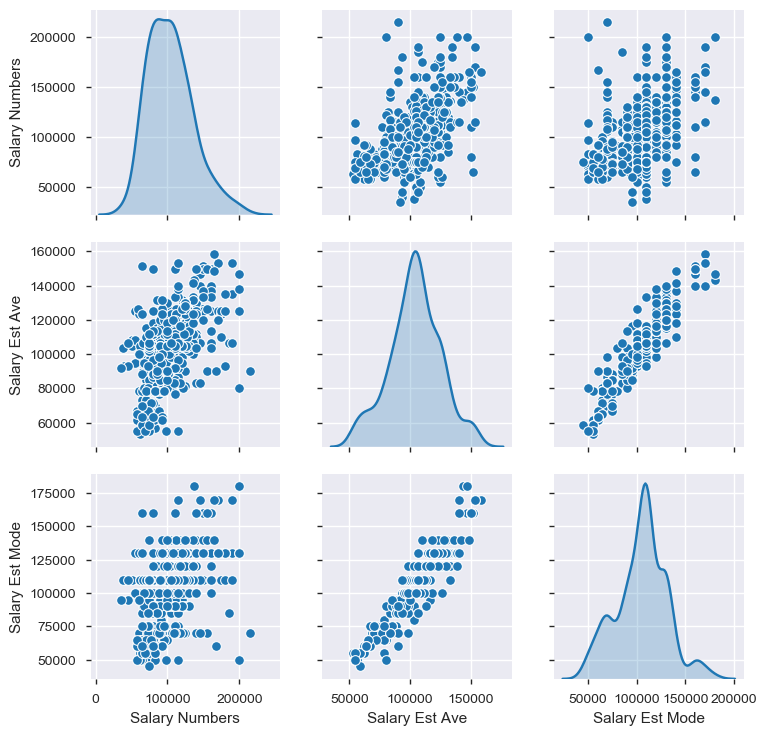

In [76]:
sns.pairplot(data=salary_df, diag_kind='kde')

* From this we can see that the Salary Est Ave is more comparable to the actual salary numbers than the Salary Est Mode values provided. They have extremely close mean values, but the actual salaries are more variant. I will use this column as my Salary/target variable

In [77]:
sal_est_df.columns

Index(['Job Title', 'Company', 'Company Rating', 'Salary', 'Industry',
       'Sub Industry', 'City', 'Proximity to city', 'Contract Type',
       'Role Description', 'Salary Estimators', 'Salary Numbers',
       'Salary Est Ave', 'Salary Est Mode'],
      dtype='object')

In [78]:
final_df = sal_est_df.drop(columns=['Salary','Salary Numbers','Salary Estimators','Salary Est Mode'])

In [79]:
final_df.head()

,Job Title,Company,Company Rating,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Est Ave
0,Digital Analyst,JORA,5.0,Marketing & Communications,Digital & Search Marketing,Melbourne,CBD & Inner Suburbs,Full Time,About Jora Jora is an Australian based job sea...,95000
1,Data Analyst - Data Quality,RACWA,3.5,Information & Communication Technology,Business/Systems Analysts,Perth,"CBD, Inner & Western Suburbs",Contract/Temp,In light of our Member Centred Program and sh...,81666
3,Junior Data Analyst,RXP Group,NaN,Information & Communication Technology,Database Development & Administration,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,RXP Group (ASX: RXP) A Digital Services Partne...,100000
4,Data Analyst,Chandler Macleod Group,NaN,Information & Communication Technology,Other,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,One of our clients is looking for a Data Speci...,100000
5,Data Analyst,Mission Australia,3.6,Community Services & Development,Aged & Disability Support,Regional,NaN,Full Time,Data Analyst – Local Area Coordination\n\nFull...,90000


###### Removing some of the left over html code from the Role Description column

In [80]:
final_df['Role Description'] = final_df['Role Description'].str.replace('\n',' ')
final_df['Role Description'] = final_df['Role Description'].str.replace('\xa0',' ')

In [81]:
final_df['Role Description'][6]

'This well established company has a start-up culture and is looking for a Junior Data Analyst with strong SQL skills and Microsoft background to join their busy team. Role  Taking requirements from stakeholders to have an end-to-end view of the reporting requirements of the business. Work closely with the business and BI team to build reports and dashboards to allow decision support. Develop and maintain code to extract the DataMart from existing data warehouse and to build new data models along with the technical documentation. Defines scope and business priorities for small-scale changes and may assist in larger scale scoping exercises. Data analysis and data modelling techniques to establish, modify or maintain a data structure. Design, code, test, and document moderately complex programs and scripts. Write technical design briefs.  Skills  Customer Focused approach 1+ years of experience in business intelligence analysis and development Proficient with SQL, Microsoft BI suite, Tab

In [82]:
final_df['Proximity to city'].fillna(value='', inplace=True)

In [83]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 0 to 4362
Data columns (total 10 columns):
Job Title            2992 non-null object
Company              2941 non-null object
Company Rating       885 non-null object
Industry             2992 non-null object
Sub Industry         2992 non-null object
City                 2992 non-null object
Proximity to city    2992 non-null object
Contract Type        2992 non-null object
Role Description     2992 non-null object
Salary Est Ave       2992 non-null int64
dtypes: int64(1), object(9)
memory usage: 337.1+ KB


## Modelling Salary

1. Train, Test Split the data based on Salary as the target variable
2. Use Count Vectorizer to see what the most frequently used terms are
3. Trial of Regression models to see how well they can predict the salary number
4. Trial of bucketing the salaries and using classification models
5. Trial of combining all text columns together 
6. Trial of feature reduction techniques

In [172]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA, NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC


##### Train test split for Salary target variable

In [85]:
X = final_df.drop(columns = 'Salary Est Ave')
y = final_df['Salary Est Ave']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Count Vectorizer

In [87]:
X_train.head()

,Job Title,Company,Company Rating,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description
2116,Technical Writer,FourQuarters Recruitment,NaN,Information & Communication Technology,Business/Systems Analysts,Melbourne,CBD & Inner Suburbs,Contract/Temp,Technical Writer | Contract | CBD The CompanyO...
1216,Analytics Consultant,Experian,3.0,Consulting & Strategy,Analysts,Melbourne,CBD & Inner Suburbs,Full Time,We are looking to fill an Analytics Consultant...
3422,Integration Lead,Wyndham City Council,3.7,Information & Communication Technology,Database Development & Administration,Melbourne,Western Suburbs,Full Time,Integration Specialist Use your innovation ...
3563,Administrator Officer,Spinifex Recruiting,NaN,Administration & Office Support,Administrative Assistants,Regional,,Contract/Temp,Spinifex Recruiting are looking for a loyal an...
3876,eCommerce Trade Analyst,Adairs,3.2,Marketing & Communications,Market Research & Analysis,Melbourne,Eastern Suburbs,Full Time,Adairs is a leading homeware and linen retaile...


In [88]:
X.shape

(2992, 9)

In [89]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2))
cvec.fit(X_train['Role Description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [90]:
len(cvec.get_feature_names())

224903

In [91]:
words = pd.DataFrame(cvec.transform(X['Role Description']).todense(), columns=cvec.get_feature_names())

In [92]:
words.shape

(2992, 224903)

In [93]:
word_counts = words.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

data           13126
experience      8926
business        7212
role            5638
team            5087
work            4914
skills          4786
working         3595
management      3430
support         3191
apply           3075
development     3012
ability         2620
information     2411
analysis        2396
strong          2392
services        2311
reporting       2291
opportunity     2239
including       2232
dtype: int64

##### Creation of a word cloud from the role description column

In [94]:
from wordcloud import WordCloud

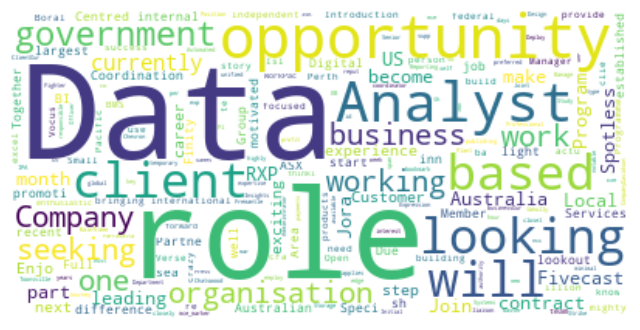

In [95]:
wc = WordCloud(background_color="white")
wc.generate(str(X['Role Description']))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

#### Let's start with a simple pipeline

In [96]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(898, 9)
(898,)
(2094, 9)
(2094,)


In [97]:
model = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df=0.5,
                                         max_features=50000,
                                         ngram_range=(1,2))),
                   ('regressor', LinearRegression())])
model.fit(X_train['Role Description'], y_train)
y_pred = model.predict(X_test['Role Description'])

print("Number of features:", len(model.steps[0][1].get_feature_names()))
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Number of features: 50000
R-squared: 0.40824196306732685
MSE: 338853128.65032375


In [98]:
model2 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df=0.5,
                                         max_features=50000,
                                         ngram_range=(1,3))),
                   ('tfidf', TfidfTransformer()),
                   ('regressor', LinearRegression())])
model2.fit(X_train['Role Description'], y_train)
y_pred = model2.predict(X_test['Role Description'])

print("Number of features:", len(model2.steps[0][1].get_feature_names()))
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Number of features: 50000
R-squared: 0.4836526990030827
MSE: 295671351.2838398


In [99]:
model3 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df=0.5,
                                         max_features=50000,
                                         ngram_range=(1,2))),
#                    ('tfidf', TfidfTransformer()),
                   ('regressor', RandomForestRegressor(max_depth=None,n_estimators=100, 
                                                       verbose=0))])
model3.fit(X_train['Role Description'], y_train)
y_pred = model3.predict(X_test['Role Description'])

print("Number of features:", len(model3.steps[0][1].get_feature_names()))
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Number of features: 50000
R-squared: 0.516919449900607
MSE: 276622108.3194564


* None of these models have worked as well as I had hoped, so I will try to bucket the salaries and reframe the problem as a slaray range classification

### Bucketing the column data so classification models can be used

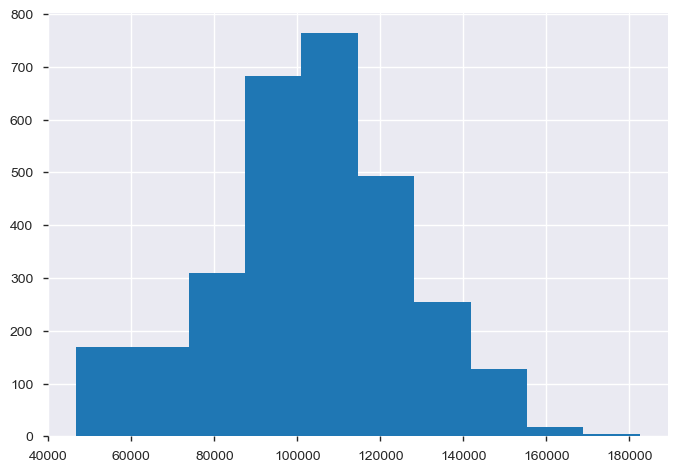

In [100]:
final_df['Salary Est Ave'].hist(bins=10)

In [101]:
def bucket_salary(data):
    if data < 80000:
        return 1
    elif data < 100000:
        return 2
    elif data < 120000:
        return 3
    elif data < 140000:
        return 4
    else:
        return 5        

In [102]:
cly_train = y_train.map(bucket_salary)
cly_test = y_test.map(bucket_salary)

##### I want to check that the train and test sets are relatively evenly distributed across the categories

In [103]:
cly_train.value_counts(normalize = True)

3    0.361987
2    0.247851
4    0.194365
1    0.137058
5    0.058739
Name: Salary Est Ave, dtype: float64

### Baseline is 36.2%

In [105]:
cly_test.value_counts(normalize = True)

3    0.324053
2    0.271715
4    0.177060
1    0.146993
5    0.080178
Name: Salary Est Ave, dtype: float64

In [106]:
model4 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df=0.5,
                                         max_features=50000,
                                         ngram_range=(1,2))),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', LogisticRegression())])
model4.fit(X_train['Role Description'], cly_train)
cly_pred = model4.predict(X_test['Role Description'])

print("F1 Score:", accuracy_score(cly_test, cly_pred))
print("Number of features:", len(model4.steps[0][1].get_feature_names()))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 Score: 0.5679287305122495
Number of features: 50000


In [107]:
model5 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df=0.5,
                                         max_features=50000,
                                         ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('classifier', RandomForestClassifier(n_estimators=100))])
model5.fit(X_train['Role Description'], cly_train)
cly_pred = model5.predict(X_test['Role Description'])

print("F1 Score:", accuracy_score(cly_test, cly_pred))
print("Number of features:", len(model5.steps[0][1].get_feature_names()))

F1 Score: 0.5178173719376392
Number of features: 50000


##### I'm not really satisfied with the results of these models just going off role description so I would like to also add in the rest of the values 

In [109]:
final_df.head()

,Job Title,Company,Company Rating,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Est Ave
0,Digital Analyst,JORA,5.0,Marketing & Communications,Digital & Search Marketing,Melbourne,CBD & Inner Suburbs,Full Time,About Jora Jora is an Australian based job sea...,95000
1,Data Analyst - Data Quality,RACWA,3.5,Information & Communication Technology,Business/Systems Analysts,Perth,"CBD, Inner & Western Suburbs",Contract/Temp,In light of our Member Centred Program and sh...,81666
3,Junior Data Analyst,RXP Group,NaN,Information & Communication Technology,Database Development & Administration,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,RXP Group (ASX: RXP) A Digital Services Partne...,100000
4,Data Analyst,Chandler Macleod Group,NaN,Information & Communication Technology,Other,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,One of our clients is looking for a Data Speci...,100000
5,Data Analyst,Mission Australia,3.6,Community Services & Development,Aged & Disability Support,Regional,,Full Time,Data Analyst – Local Area Coordination Full T...,90000


##### Create a new column that combines all the other columns which are able to be used

In [110]:
X_train_all = pd.DataFrame(X_train['Job Title'] + ' ' + X_train['Industry'] + ' ' + X_train['Sub Industry'] + \
                           ' ' + X_train['City'] +' ' + X_train['Proximity to city'] + ' ' + \
                           X_train['Contract Type'] + ' ' + X_train['Role Description'])

In [111]:
X_train_all.head()

,0
2116,Technical Writer Information & Communication T...
1216,Analytics Consultant Consulting & Strategy Ana...
3422,Integration Lead Information & Communication T...
3563,Administrator Officer Administration & Office...
3876,eCommerce Trade Analyst Marketing & Communicat...


In [112]:
X_train_all.rename(columns = {0:'Text'}, inplace=True)

In [113]:
X_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2116 to 465
Data columns (total 1 columns):
Text    2094 non-null object
dtypes: object(1)
memory usage: 32.7+ KB


##### Do the same to the test set as the train set

In [114]:
X_test_all = pd.DataFrame(X_test['Job Title'] + ' ' + X_test['Industry'] + ' ' + X_test['Sub Industry'] + \
                          ' ' + X_test['City'] +' ' + X_test['Proximity to city'] + ' ' + \
                          X_test['Contract Type'] + ' ' + X_test['Role Description'])

In [115]:
X_test_all.rename(columns = {0:'Text'}, inplace=True)

In [116]:
print(X_train_all.shape)
print(cly_train.shape)
print(X_test_all.shape)
print(cly_test.shape)

(2094, 1)
(2094,)
(898, 1)
(898,)


##### Now I want to see if there is much difference in this new X using a wordcloud

In [117]:
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2))
cvec.fit(X_train_all['Text'])

words = pd.DataFrame(cvec.transform(X_train_all['Text']).todense(), columns=cvec.get_feature_names())

print("Shape:", words.shape)

word_counts = words.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)


Shape: (2094, 227794)


data             10047
experience        6210
business          5559
role              3908
team              3537
work              3403
skills            3350
information       3023
working           2512
management        2480
technology        2394
support           2390
development       2332
time              2277
communication     2259
apply             2085
analysis          1921
reporting         1918
analyst           1915
ability           1852
dtype: int64

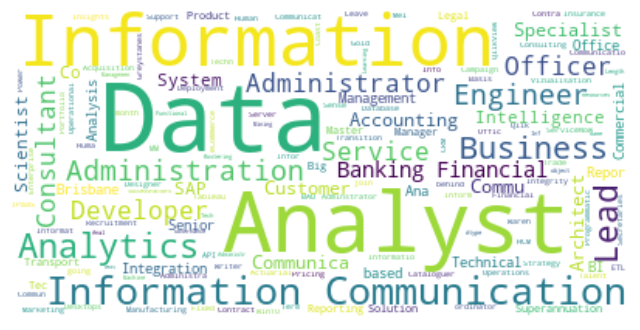

In [118]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white")
wc.generate(str(X_train_all['Text']))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

##### Trial and error of models using the new X 

In [119]:
model6 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         min_df = 0,
                                         max_features=80000,
                                         ngram_range=(1,3))),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', LogisticRegression())])
model6.fit(X_train_all['Text'], cly_train)
cly_pred = model6.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model6.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(cly_test, cly_pred, labels=[1,2,3,4,5]))

confusion = pd.DataFrame(conmat, index=['is_1', 'is_2', 'is_3', 'is_4', 'is_5'],
                         columns=['pred_1','pred_2','pred_3','pred_4','pred_5'])
print("Confusion Matrix:")
confusion.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.71      0.72       132
           2       0.61      0.57      0.59       244
           3       0.58      0.69      0.63       291
           4       0.61      0.57      0.59       159
           5       0.74      0.44      0.56        72

    accuracy                           0.62       898
   macro avg       0.65      0.60      0.62       898
weighted avg       0.63      0.62      0.62       898

Number of features: 80000
Confusion Matrix:


,pred_1,pred_2,pred_3,pred_4,pred_5
is_1,94,16,18,4,0
is_2,21,138,70,14,1
is_3,9,57,202,22,1
is_4,2,11,46,91,9
is_5,2,4,15,19,32


In [120]:
%%time

model7 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df=0.5,
                                         max_features=50000,
                                         ngram_range=(1,3))),
#                    ('svd',TruncatedSVD(n_components=500, 
#                                        n_iter=7, 
#                                        random_state=42)),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', RandomForestClassifier(n_estimators=100))])
model7.fit(X_train_all['Text'], cly_train)
cly_pred = model7.predict(X_test_all['Text'])

print("F1 Score:", accuracy_score(cly_test, cly_pred))
print("Number of features:", len(model7.steps[0][1].get_feature_names()))

F1 Score: 0.5902004454342984
Number of features: 50000
CPU times: user 9.4 s, sys: 192 ms, total: 9.59 s
Wall time: 9.54 s


In [121]:
model8 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.5,
                                         max_features=100000,
                                         ngram_range=(1,3))),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', MultinomialNB())])
model8.fit(X_train_all['Text'], cly_train)
cly_pred = model8.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model8.steps[0][1].get_feature_names()))
print("Features:", model8)

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.65      0.71       132
           2       0.54      0.46      0.50       244
           3       0.48      0.76      0.59       291
           4       0.60      0.40      0.48       159
           5       0.62      0.14      0.23        72

    accuracy                           0.55       898
   macro avg       0.61      0.48      0.50       898
weighted avg       0.58      0.55      0.54       898

Number of features: 100000
Features: Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=100000, min_df=1,
                                 ngram_range=(1, 3), preproces

In [122]:
model9 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         max_features= 80000,
                                         ngram_range=(1,3))),
                   ('tfidf', TfidfTransformer()),
                   ('classifier', LinearSVC(random_state=42))])
model9.fit(X_train_all['Text'], cly_train)
cly_pred = model9.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model9.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(cly_test, cly_pred, labels=[1,2,3,4,5]))

confusion = pd.DataFrame(conmat, index=['is_1', 'is_2', 'is_3', 'is_4', 'is_5'],
                         columns=['pred_1','pred_2','pred_3','pred_4','pred_5'])
print("Confusion Matrix:")
confusion.head()

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.71      0.73       132
           2       0.65      0.57      0.61       244
           3       0.58      0.72      0.64       291
           4       0.59      0.55      0.57       159
           5       0.77      0.50      0.61        72

    accuracy                           0.63       898
   macro avg       0.67      0.61      0.63       898
weighted avg       0.64      0.63      0.63       898

Number of features: 80000
Confusion Matrix:


,pred_1,pred_2,pred_3,pred_4,pred_5
is_1,94,20,12,5,1
is_2,18,140,74,11,1
is_3,10,43,210,27,1
is_4,1,9,54,87,8
is_5,2,2,15,17,36


##### My best performing models so far are 6 (logistic regression) and 9 (linear SVC), I want to try using some feature reduction techniques on them

In [123]:
%%time

model6_2 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         min_df = 0, 
                                         max_features=80000,
                                         ngram_range=(1,3))),
                     ('svd', TruncatedSVD(n_components=1000, 
                                       n_iter=7, 
                                       random_state=42)),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', LogisticRegression())])
model6_2.fit(X_train_all['Text'], cly_train)
cly_pred = model6_2.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model6_2.steps[0][1].get_feature_names()))
confusion.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.71      0.70       132
           2       0.60      0.53      0.56       244
           3       0.56      0.64      0.60       291
           4       0.53      0.53      0.53       159
           5       0.63      0.44      0.52        72

    accuracy                           0.59       898
   macro avg       0.60      0.57      0.58       898
weighted avg       0.59      0.59      0.59       898

Number of features: 80000
CPU times: user 1min 57s, sys: 30.2 s, total: 2min 27s
Wall time: 2min 7s


In [124]:
%%time

model6_4 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         min_df = 0, 
                                         max_features=80000,
                                         ngram_range=(1,3))),
                     ('feature selector', SelectKBest(chi2, k=2000)),
                     ('classifier', LogisticRegression())])
model6_4.fit(X_train_all['Text'], cly_train)
cly_pred = model6_4.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model6_4.steps[0][1].get_feature_names()))
confusion.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.71      0.71       132
           2       0.60      0.52      0.56       244
           3       0.56      0.70      0.62       291
           4       0.56      0.55      0.56       159
           5       0.74      0.40      0.52        72

    accuracy                           0.60       898
   macro avg       0.64      0.58      0.60       898
weighted avg       0.61      0.60      0.60       898

Number of features: 80000
CPU times: user 5.75 s, sys: 268 ms, total: 6.01 s
Wall time: 6.15 s


In [125]:
%%time
model9_2 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         max_features= 80000,
                                         ngram_range=(1,3))),
                   ('tfidf', TfidfTransformer()),
                   ('svd', TruncatedSVD(n_components=500, 
                                       n_iter=7, 
                                       random_state=42)),  
                   ('classifier', LinearSVC(random_state=42))])
model9_2.fit(X_train_all['Text'], cly_train)
cly_pred = model9_2.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
conmat = np.array(confusion_matrix(cly_test, cly_pred, labels=[1,2,3,4,5]))

confusion = pd.DataFrame(conmat, index=['is_1', 'is_2', 'is_3', 'is_4', 'is_5'],
                         columns=['pred_1','pred_2','pred_3','pred_4','pred_5'])
print("Confusion Matrix:")
confusion.head()

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.70      0.72       132
           2       0.59      0.52      0.55       244
           3       0.53      0.71      0.61       291
           4       0.58      0.50      0.54       159
           5       0.76      0.35      0.48        72

    accuracy                           0.59       898
   macro avg       0.64      0.55      0.58       898
weighted avg       0.60      0.59      0.59       898

Confusion Matrix:
CPU times: user 53.5 s, sys: 13.4 s, total: 1min 6s
Wall time: 1min 3s


In [126]:
model9_3 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         max_features= 80000,
                                         ngram_range=(1,3))),
                   ('feature selector', SelectKBest(chi2, k=500)), 
                   ('classifier', LinearSVC(random_state=42))])
model9_3.fit(X_train_all['Text'], cly_train)
cly_pred = model9_3.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model9_3.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(cly_test, cly_pred, labels=[1,2,3,4,5]))

confusion = pd.DataFrame(conmat, index=['is_1', 'is_2', 'is_3', 'is_4', 'is_5'],
                         columns=['pred_1','pred_2','pred_3','pred_4','pred_5'])
print("Confusion Matrix:")
confusion.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.70      0.71       132
           2       0.57      0.54      0.55       244
           3       0.54      0.64      0.59       291
           4       0.60      0.53      0.56       159
           5       0.70      0.51      0.59        72

    accuracy                           0.59       898
   macro avg       0.63      0.58      0.60       898
weighted avg       0.60      0.59      0.59       898

Number of features: 80000
Confusion Matrix:


,pred_1,pred_2,pred_3,pred_4,pred_5
is_1,92,19,17,4,0
is_2,19,132,84,6,3
is_3,14,62,187,24,4
is_4,2,14,50,84,9
is_5,0,6,7,22,37


##### Model 9 is the best model I have managed to come up with so I will use this to show the top descriptors for each of my salary brackets

In [517]:
features_df = pd.DataFrame(index = model9.steps[0][1].get_feature_names(), 
                           data = model9.named_steps['classifier'].coef_.T, 
                           columns=['<$80k','$80k-100k','$100k-120k','$120k-140k','$140k+'])
features_df.head()

,<$80k,$80k-100k,$100k-120k,$120k-140k,$140k+
00,0.046745,0.262058,-0.297726,-0.008329,-0.007953
000,-0.180902,0.242798,0.015374,0.089249,-0.112272
000 annum,-0.052816,0.146559,-0.027003,-0.050065,-0.009700
000 customers,-0.022685,0.159590,-0.058342,-0.046100,-0.011663
000 employee,-0.010438,-0.013668,-0.008504,-0.000397,0.024652


In [520]:
features = features_df.sort_values(by=['<$80k'], ascending = False)
features.index[0:11]

Index(['officer', 'administrative', 'administration', 'entry', 'assistant',
       'inventory', 'data entry', 'administrator', 'support officer',
       'support', 'office'],
      dtype='object')

In [523]:
features.columns

Index(['<$80k', '$80k-100k', '$100k-120k', '$120k-140k', '$140k+'], dtype='object')

In [525]:
feature_importance = {}
for i, j in enumerate(features.columns):
    features = features_df.sort_values(by=[j], ascending = False)
    feature_importance[j] = features.index[0:20].values

In [526]:
pd.DataFrame(feature_importance)

,<$80k,$80k-100k,$100k-120k,$120k-140k,$140k+
0,officer,analyst,developer,data engineer,architect
1,administrative,data analyst,business,lead,data architect
2,administration,pricing,technical business analyst,data scientist,solution architect
3,entry,reporting analyst,technical business,scientist,solution
4,assistant,salesforce,bi developer,data modeller,architecture
5,inventory,sql developer,developers,engineer,cloud
6,data entry,retail,projects,etl,technology architects melbourne
7,administrator,programmer,technical,build,architects melbourne
8,support officer,access,analysis,manager information,enterprise
9,support,clinical,finance,pipelines,technology architects


We can see from the above table that there are some very obvious trends among the 5 salary brackets:
1.  <$80k : office and admin support roles
2.  $80k - 100k : data analyst roles, interestingly also the word regional is included in here, which was the extra category I created to      describe anything not within major capital cities
3.  $100k - $120k : business analyst and development type roles
4.  $120k - $140k : data scientist and management roles
5.  $140k + : data architect and cloud solutions rolesc

### Bonus: Remove any overpredictions
* Use model 6 and remove any of the overpredictions by adjusting the classification threshold. A reminder of what model 6's confusion matrix looks like:

In [486]:
model6.fit(X_train_all['Text'], cly_train)
cly_pred = model6.predict(X_test_all['Text'])


conmat = np.array(confusion_matrix(cly_test, cly_pred, labels=[1,2,3,4,5]))

confusion = pd.DataFrame(conmat, index=['is_1', 'is_2', 'is_3', 'is_4', 'is_5'],
                         columns=['pred_1','pred_2','pred_3','pred_4','pred_5'])
print("Confusion Matrix:")
confusion.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Confusion Matrix:


,pred_1,pred_2,pred_3,pred_4,pred_5
is_1,94,16,18,4,0
is_2,21,138,70,14,1
is_3,9,57,202,22,1
is_4,2,11,46,91,9
is_5,2,4,15,19,32


In [ ]:
### We want any value above the diagonal to be 0

In [488]:
y_probs = model6.predict_proba(X_test_all['Text'])
prob_df = pd.DataFrame(y_probs, columns=[1,2,3,4,5])
prob_df.head()

,1,2,3,4,5
0,0.000249,0.018266,0.944698,0.035106,0.001680
1,0.012185,0.031979,0.751199,0.164680,0.039957
2,0.008712,0.003314,0.000636,0.931917,0.055422
3,0.000539,0.000025,0.559825,0.168795,0.270815
4,0.052265,0.018080,0.815796,0.108829,0.005030


In [495]:
prob_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,898.0,0.140879,0.304455,6.888377e-14,0.000074,0.001162,0.038419,0.999911
2,898.0,0.254386,0.350681,2.691992e-09,0.002765,0.035130,0.473727,0.999716
3,898.0,0.383390,0.396146,1.986326e-07,0.009998,0.191043,0.837945,0.999783
4,898.0,0.167760,0.306021,1.578968e-07,0.000898,0.010379,0.124031,0.999064
5,898.0,0.053585,0.191314,1.312367e-09,0.000051,0.000394,0.003214,0.997200


In [508]:
model6_5 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                         max_df = 0.8,
                                         min_df = 0,
                                         max_features=80000,
                                         ngram_range=(1,3))),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', LogisticRegression(class_weight = {1:0.9, 2:0.01, 3:0.01, 4:0.01, 5: 0.01}))])
model6_5.fit(X_train_all['Text'], cly_train)
cly_pred = model6_5.predict(X_test_all['Text'])
print("Classification Report:")
print(classification_report(cly_test, cly_pred))
print("Number of features:", len(model6_5.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(cly_test, cly_pred, labels=[1,2,3,4,5]))

confusion = pd.DataFrame(conmat, index=['is_1', 'is_2', 'is_3', 'is_4', 'is_5'],
                         columns=['pred_1','pred_2','pred_3','pred_4','pred_5'])
print("Confusion Matrix:")
confusion.head()

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.88      0.72       132
           2       0.65      0.50      0.57       244
           3       0.59      0.67      0.63       291
           4       0.62      0.58      0.60       159
           5       0.78      0.39      0.52        72

    accuracy                           0.62       898
   macro avg       0.65      0.61      0.61       898
weighted avg       0.63      0.62      0.61       898

Number of features: 80000
Confusion Matrix:


,pred_1,pred_2,pred_3,pred_4,pred_5
is_1,116,7,6,3,0
is_2,40,122,70,11,1
is_3,27,43,196,25,0
is_4,3,8,48,93,7
is_5,4,7,15,18,28


In [509]:
for i in np.arange(90,100)/100.:
    fp_count = sum(np.array([1 if x >= i else 0 for x in prob_df[5].values]))
    print("For threshold {} false positive count is {}".format(i,fp_count))

For threshold 0.9 false positive count is 27
For threshold 0.91 false positive count is 27
For threshold 0.92 false positive count is 27
For threshold 0.93 false positive count is 26
For threshold 0.94 false positive count is 24
For threshold 0.95 false positive count is 20
For threshold 0.96 false positive count is 15
For threshold 0.97 false positive count is 11
For threshold 0.98 false positive count is 7
For threshold 0.99 false positive count is 3


In [510]:
for i in np.arange(90,100)/100.:
    fp_count = sum(np.array([1 if x >= i else 0 for x in prob_df[4].values]))
    print("For threshold {} false positive count is {}".format(i,fp_count))

For threshold 0.9 false positive count is 66
For threshold 0.91 false positive count is 61
For threshold 0.92 false positive count is 58
For threshold 0.93 false positive count is 57
For threshold 0.94 false positive count is 51
For threshold 0.95 false positive count is 49
For threshold 0.96 false positive count is 48
For threshold 0.97 false positive count is 35
For threshold 0.98 false positive count is 25
For threshold 0.99 false positive count is 16


* By changing the thresholds of the class prediction, I have managed to reduce the amount of false positives by a little bit, but not very much. As can be seen above, even with a threshold of 0.99, it is still not possible to reduce the number of false positives to zero on this model. Another approach would need to be taken to solve this problem.

## Part 2 : Distinguishing Job Title 
1. Investigate the different values within the Job Title Field
2. Create an LDA visualisation of Role Description to see if this model can be used to distinguish between roles
3. Mapping these topics onto the original data and using this as a new target
4. Using Job Title and the two idustry columns to see if they can predict the topics selected by the LDA model



In [248]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


In [180]:
df['Job Title'].value_counts()

Business Analyst                                                                  102
Data Analyst                                                                       70
Data Engineer                                                                      42
Technical Business Analyst                                                         42
Data Architect                                                                     35
Data Scientist                                                                     30
Senior Business Analyst                                                            26
Commercial Analyst                                                                 19
Senior Data Scientist                                                              18
Senior Data Engineer                                                               14
Solution Architect                                                                 14
Senior Data Analyst                                   

In [232]:
X['Job Title'] = X['Job Title'].map(lambda x: x.lower())

In [ ]:
## here the token pattern is matching to words of three letters or more that are only in the english alphabet

In [455]:
cvec2 = CountVectorizer(stop_words='english',
                        lowercase = True,
                        token_pattern = r'\b[a-zA-Z]{3,}\b',
                        max_df = 0.5,
                        min_df = 2)
term_doc_matrix = cvec2.fit_transform(final_df['Role Description'])
print(term_doc_matrix.shape)

(2992, 10974)


In [456]:
term_doc_matrix

<2992x10974 sparse matrix of type '<class 'numpy.int64'>'
	with 404510 stored elements in Compressed Sparse Row format>

In [458]:
lda = LatentDirichletAllocation(n_components=5, random_state=0, n_jobs=3)

In [459]:
model = lda.fit(term_doc_matrix)

In [477]:
pyLDAvis.sklearn.prepare(model, term_doc_matrix, cvec2)

/Applications/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.065798 -0.034820       1        1  28.773772
4      0.005981 -0.100409       2        1  21.289418
3      0.129286  0.072317       3        1  17.612873
2      0.037512 -0.029825       4        1  17.517261
0     -0.106981  0.092738       5        1  14.806676, topic_info=      Category         Freq          Term        Total  loglift  logprob
9336   Default  1745.000000           sql  1745.000000  30.0000  30.0000
8301   Default  1145.000000      research  1145.000000  29.0000  29.0000
4548   Default   948.000000        health   948.000000  28.0000  28.0000
5930   Default   781.000000     marketing   781.000000  27.0000  27.0000
8838   Default   567.000000        server   567.000000  26.0000  26.0000
9879   Default  2166.000000     technical  2166.000000  25.0000  25.0000
5024   Default  1042.000000      insights  1042.000000  24.0000  24.0000
8218   Default  2266.000000     reporting  2266.000000  23.0000  23.0000
2500   Default   757.000000      database   757.000000  22.0000  22.0000
462    Default  1770.000000     analytics  1770.000000  21.0000  21.0000
1765   Default   696.000000         cloud   696.000000  20.0000  20.0000
7290   Default  1419.000000      position  1419.000000  19.0000  19.0000
2716   Default  1592.000000        design  1592.000000  18.0000  18.0000
8467   Default   669.000000          risk   669.000000  17.0000  17.0000
1924   Default  1481.000000       company  1481.000000  16.0000  16.0000
3929   Default  1241.000000     financial  1241.000000  15.0000  15.0000
621    Default   670.000000  architecture   670.000000  14.0000  14.0000
9190   Default   764.000000      solution   764.000000  13.0000  13.0000
2195   Default   882.000000      contract   882.000000  12.0000  12.0000
2448   Default  1769.000000      customer  1769.000000  11.0000  11.0000
5074   Default   742.000000   integration   742.000000  10.0000  10.0000
3556   Default   425.000000           etl   425.000000   9.0000   9.0000
8621   Default   675.000000         sales   675.000000   8.0000   8.0000
6781   Default   377.000000        oracle   377.000000   7.0000   7.0000
6142   Default   717.000000     microsoft   717.000000   6.0000   6.0000
554    Default  1120.000000   application  1120.000000   5.0000   5.0000
9192   Default  2086.000000     solutions  2086.000000   4.0000   4.0000
2779   Default   382.000000     developer   382.000000   3.0000   3.0000
6156   Default   355.000000     migration   355.000000   2.0000   2.0000
9907   Default  1581.000000    technology  1581.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
2195    Topic5   449.846768      contract   882.870579   1.2358  -5.1463
3770    Topic5    94.114052     extension   125.180347   1.6248  -6.7107
7327    Topic5   281.997042         power   518.869293   1.3003  -5.6133
8734    Topic5    72.326275       scripts    90.524854   1.6857  -6.9740
5830    Topic5   240.589634   maintenance   480.976794   1.2174  -5.7721
5083    Topic5   304.102676  intelligence   665.753334   1.1265  -5.5379
4359    Topic5   308.957729    government   742.137244   1.0338  -5.5220
6300    Topic5   251.401669         month   567.952368   1.0951  -5.7282
9879    Topic5   608.223875     technical  2166.149852   0.6399  -4.8447
8254    Topic5   474.909418      required  1532.841531   0.7383  -5.0921
5074    Topic5   295.649406   integration   742.360990   0.9894  -5.5660
8218    Topic5   593.879311     reporting  2266.513806   0.5708  -4.8685
9756    Topic5   496.680245       systems  1830.347825   0.6058  -5.0473
2716    Topic5   452.645193        design  1592.127804   0.6524  -5.1401
5420    Topic5   486.042439     knowledge  1838.910113   0.5795  -5.0689
8850    Topic5   545.365349      services  2261.736380   0.4877  -4.9538
554     Topic5   353.964646   application  1120.974558   0.7573  -5.3860
17

In [460]:
topic_values = lda.transform(term_doc_matrix)
topic_values.shape

(2992, 5)

In [461]:
final_df['Topic'] = topic_values.argmax(axis=1)

In [462]:
final_df.head()

,Job Title,Company,Company Rating,Industry,Sub Industry,City,Proximity to city,Contract Type,Role Description,Salary Est Ave,Topic
0,Digital Analyst,JORA,5.0,Marketing & Communications,Digital & Search Marketing,Melbourne,CBD & Inner Suburbs,Full Time,About Jora Jora is an Australian based job sea...,95000,2
1,Data Analyst - Data Quality,RACWA,3.5,Information & Communication Technology,Business/Systems Analysts,Perth,"CBD, Inner & Western Suburbs",Contract/Temp,In light of our Member Centred Program and sh...,81666,3
3,Junior Data Analyst,RXP Group,NaN,Information & Communication Technology,Database Development & Administration,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,RXP Group (ASX: RXP) A Digital Services Partne...,100000,1
4,Data Analyst,Chandler Macleod Group,NaN,Information & Communication Technology,Other,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,One of our clients is looking for a Data Speci...,100000,0
5,Data Analyst,Mission Australia,3.6,Community Services & Development,Aged & Disability Support,Regional,,Full Time,Data Analyst – Local Area Coordination Full T...,90000,3


In [512]:
topic_df = final_df.loc[:,['Job Title','Industry','Sub Industry','Topic']].sort_values(by='Topic')
topic_df.head(10)

,Job Title,Industry,Sub Industry,Topic
4362,Web Administrator/Developer - Contract - Sydne...,Information & Communication Technology,Web Development & Production,0
2507,Quality Control Analyst,Science & Technology,Chemistry & Physics,0
2498,Business Intelligence Analysts (Power BI),Government & Defence,Government - Federal,0
785,Qlik Developers,Information & Communication Technology,Database Development & Administration,0
786,Senior Reporting Analyst - Power BI,Information & Communication Technology,Developers/Programmers,0
2480,Solution Developer,Information & Communication Technology,Developers/Programmers,0
790,Groundwater Modeller - Hydrogeologist,Science & Technology,Modelling & Simulation,0
2478,Business Intelligence Developer,Information & Communication Technology,Database Development & Administration,0
2468,SQL Analyst/Developer,Information & Communication Technology,Developers/Programmers,0
798,Junior Systems Administrator and Data Analyst,Information & Communication Technology,Networks & Systems Administration,0


In [464]:
X2 = topic_df.drop(columns='Topic')
y2 = topic_df['Topic']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [465]:
y2_train.value_counts(normalize=True)

1    0.323305
2    0.202006
4    0.184336
0    0.151385
3    0.138968
Name: Topic, dtype: float64

In [466]:
# baseline is 32.3

In [467]:
y2_test.value_counts(normalize=True)

1    0.311804
2    0.200445
4    0.199332
0    0.157016
3    0.131403
Name: Topic, dtype: float64

In [513]:
model10 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                             token_pattern = r'\b[a-zA-Z]{2,}\b',
                                             )),
                   ('tfidf', TfidfTransformer()),
                   ('classifier', LogisticRegression())])
model10.fit(X2_train['Job Title'], y2_train)
y2_pred = model10.predict(X2_test['Job Title'])
print("Classification Report:")
print(classification_report(y2_test, y2_pred))
print("Number of features:", len(model10.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(y2_test, y2_pred, labels=[0,1,2,3,4]))

confusion = pd.DataFrame(conmat, index=['is_0', 'is_1', 'is_2', 'is_3', 'is_4'],
                         columns=['pred_0','pred_1','pred_2','pred_3','pred_4'])
print("Confusion Matrix:")
confusion.head()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50       141
           1       0.62      0.78      0.69       280
           2       0.58      0.67      0.62       180
           3       0.64      0.41      0.50       118
           4       0.59      0.51      0.54       179

    accuracy                           0.60       898
   macro avg       0.60      0.56      0.57       898
weighted avg       0.60      0.60      0.59       898

Number of features: 971
Confusion Matrix:


,pred_0,pred_1,pred_2,pred_3,pred_4
is_0,62,49,11,5,14
is_1,24,218,12,5,21
is_2,10,24,120,8,18
is_3,6,24,29,48,11
is_4,7,38,34,9,91


In [514]:
model11 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                             token_pattern = r'\b[a-zA-Z]{2,}\b',
                                             )),
                   ('tfidf', TfidfTransformer()),
                   ('classifier', RandomForestClassifier(n_estimators=100))])
model11.fit(X2_train['Job Title'], y2_train)
y2_pred = model11.predict(X2_test['Job Title'])
print("Classification Report:")
print(classification_report(y2_test, y2_pred))
print("Number of features:", len(model11.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(y2_test, y2_pred, labels=[0,1,2,3,4]))

confusion = pd.DataFrame(conmat, index=['is_0', 'is_1', 'is_2', 'is_3', 'is_4'],
                         columns=['pred_0','pred_1','pred_2','pred_3','pred_4'])
print("Confusion Matrix:")
confusion.head()

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52       141
           1       0.62      0.75      0.68       280
           2       0.56      0.62      0.59       180
           3       0.51      0.40      0.45       118
           4       0.53      0.49      0.51       179

    accuracy                           0.58       898
   macro avg       0.57      0.54      0.55       898
weighted avg       0.57      0.58      0.57       898

Number of features: 971
Confusion Matrix:


,pred_0,pred_1,pred_2,pred_3,pred_4
is_0,63,43,13,6,16
is_1,19,209,15,10,27
is_2,8,23,112,18,19
is_3,6,19,30,47,16
is_4,6,43,31,11,88


#### From looking at the confusion matrices of these two models, it is clear to me that groups 0 and 3 are very similar so I want to add in the industry columns to see if these can improve the predictions

In [470]:
X2_train_all = pd.DataFrame(X2_train['Job Title'] + ' ' + X2_train['Industry'] + ' ' + X2_train['Sub Industry']).rename(columns = {0:'Text'})
X2_test_all = pd.DataFrame(X2_test['Job Title'] + ' ' + X2_test['Industry'] + ' ' + X2_test['Sub Industry']).rename(columns = {0:'Text'})

In [471]:
X2_train_all.head()

,Text
3756,"Consultant, Mobility Tax, People Advisory Serv..."
3704,Business Analyst (Insurance) - Exciting opport...
405,Data Analyst Information & Communication Techn...
3236,Enterprise Architect Information & Communicati...
2388,Fault Managment Analyst - Network Incident Man...


In [472]:
model10_2 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                             token_pattern = r'\b[a-zA-Z]{2,}\b',
                                             max_df = 0.8,
                                             min_df = 2)),
                   ('tfidf', TfidfTransformer()),
                   ('classifier', LogisticRegression())])
model10_2.fit(X2_train_all['Text'], y2_train)
y2_pred = model10_2.predict(X2_test_all['Text'])
print("Classification Report:")
print(classification_report(y2_test, y2_pred))
print("Number of features:", len(model10_2.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(y2_test, y2_pred, labels=[0,1,2,3,4]))

confusion = pd.DataFrame(conmat, index=['is_0', 'is_1', 'is_2', 'is_3', 'is_4'],
                         columns=['pred_0','pred_1','pred_2','pred_3','pred_4'])
print("Confusion Matrix:")
confusion.head()

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       141
           1       0.59      0.84      0.70       280
           2       0.72      0.66      0.69       180
           3       0.74      0.57      0.64       118
           4       0.65      0.49      0.56       179

    accuracy                           0.63       898
   macro avg       0.65      0.60      0.61       898
weighted avg       0.64      0.63      0.63       898

Number of features: 569
Confusion Matrix:


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,pred_0,pred_1,pred_2,pred_3,pred_4
is_0,62,64,6,5,4
is_1,26,236,1,1,16
is_2,9,26,118,8,19
is_3,7,18,19,67,7
is_4,8,55,19,10,87


In [473]:
model11_2 = Pipeline([('cvec', CountVectorizer(stop_words='english',
                                             token_pattern = r'\b[a-zA-Z]{2,}\b')),
#                    ('tfidf', TfidfTransformer()),
                   ('classifier', RandomForestClassifier(n_estimators=100))])
model11_2.fit(X2_train_all['Text'], y2_train)
y2_pred = model11_2.predict(X2_test_all['Text'])
print("Classification Report:")
print(classification_report(y2_test, y2_pred))
print("Number of features:", len(model11_2.steps[0][1].get_feature_names()))
conmat = np.array(confusion_matrix(y2_test, y2_pred, labels=[0,1,2,3,4]))

confusion = pd.DataFrame(conmat, index=['is_0', 'is_1', 'is_2', 'is_3', 'is_4'],
                         columns=['pred_0','pred_1','pred_2','pred_3','pred_4'])
print("Confusion Matrix:")
confusion.head()

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       141
           1       0.62      0.74      0.68       280
           2       0.61      0.59      0.60       180
           3       0.67      0.54      0.60       118
           4       0.63      0.53      0.57       179

    accuracy                           0.61       898
   macro avg       0.61      0.58      0.59       898
weighted avg       0.61      0.61      0.60       898

Number of features: 1070
Confusion Matrix:


,pred_0,pred_1,pred_2,pred_3,pred_4
is_0,74,47,10,5,5
is_1,38,206,13,2,21
is_2,11,22,107,16,24
is_3,10,15,23,64,6
is_4,13,40,23,9,94


##### Model 10_2 is performing the best on this, let's take a look at it's features

In [474]:
def features(model):
    features_df = pd.DataFrame(index = model.steps[0][1].get_feature_names(), 
                               data = model.named_steps['classifier'].coef_.T, 
                               columns=[0,1,2,3,4])
    features = features_df.sort_values(by=[1], ascending = False)
    features.index[0:11]

    feature_importance = {}
    
    for i in range(0,5):
        features = features_df.sort_values(by=[i], ascending = False)
        feature_importance[i] = features.index[0:20].values
        
    return pd.DataFrame(feature_importance)

In [475]:
features(model10_2).head()

,0,1,2,3,4
0,sql,engineer,accounting,research,marketing
1,oracle,technical,entry,officer,actuarial
2,communication,business,support,training,risk
3,etl,python,transport,statistician,insights
4,technology,consultants,sap,state,banking


In [476]:
role_descriptors = {}
for i,topic in enumerate(lda.components_):
    role_descriptors[i] = [cvec2.get_feature_names()[i] for i in topic.argsort()[-10:]]
    
pd.DataFrame(role_descriptors)

,0,1,2,3,4
0,information,strong,communication,services,stakeholders
1,knowledge,clients,high,time,risk
2,including,project,ability,including,financial
3,systems,software,customer,ability,key
4,database,requirements,strong,applications,marketing
5,server,new,new,people,customer
6,services,design,analysis,position,insights
7,reporting,technology,opportunity,information,reporting
8,technical,technical,reporting,health,analysis
9,sql,solutions,company,research,analytics


##### Previous to this, cvec2 had a max_df of 0.8 and the models were only ~ 0.02 worse than these are now performing, HOWEVER, all these words were too similar so I went back and adjusted it to 0.5 and now it's looking a lot better